In [8]:
import qiskit as q
from qiskit.visualization import plot_histogram as pth
from qiskit.tools.visualization import plot_bloch_multivector as pbs
import numpy as np

%matplotlib inline

In [3]:
statevector_sim = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

In [4]:
def do_job(circuit):
    job = q.execute(circuit, backend=statevector_sim).result()
    statevec = job.get_statevector()
    
    n_qubits = circuit.n_qubits
    circuit.measure( [i for i in range(n_qubits)],[i for i in range(len(circuit.clbits))] )  
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

State vector:
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j] 

 Counts:  {'11': 1024}


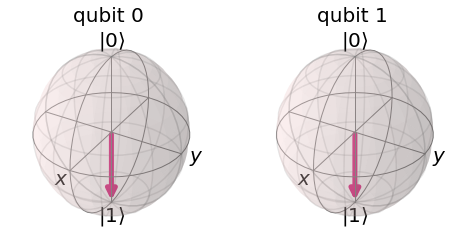

In [137]:
circuit = q.QuantumCircuit(2,2)

# https://quantum-computing.ibm.com/support/guides/gate-overview?section=5d00d964853ef8003c6d6820#rx-gate
# circuit.rx(2*np.pi,0) = identity gate

# ---- First cicruit ------#
# circuit.x(0) # == circuit.rx(np.pi)
# circuit.cx([0], [1])
# -------------------------#

# ---- Second cicruit -----#
# Entangelment
circuit.x(0)
circuit.cx(0,1)
# -------------------------#

# # ---- Third cicruit -----#
# circuit.h(0)
# circuit.rx((-np.pi/2),1)
# # -------------------------#

# ---- Fourth cicruit -----#
# Any rotation for both qubits u3(x,y,z)
# circuit.u3(-np.pi/2, np.pi/2, -np.pi/2, [0,1]) #Bell's minus state
# circuit.u3(np.pi/2, np.pi/2, np.pi/2, 0) #Bell's plus state
# -------------------------#
statevec, counts = do_job(circuit)

print("State vector:\n", statevec, "\n\n", "Counts: ", counts)
pbs(statevec)

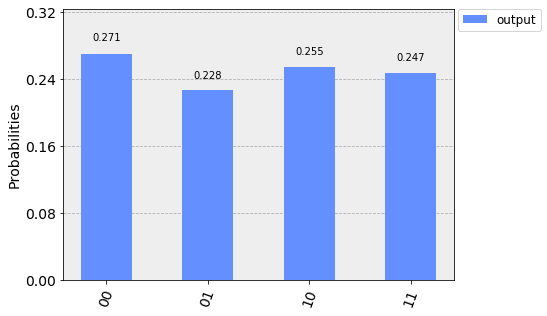

In [133]:
pth([counts], legend=["output"])

Random values:  [5.08063536 4.9751941  1.91099217 0.81398399 2.92149033 1.84882753] 

State vector:
 [-0.53848101+0.j         -0.28702831+0.05774775j -0.07588299+0.69000582j
  0.03354941+0.37593393j] 

 Counts: {'00': 523, '11': 501}


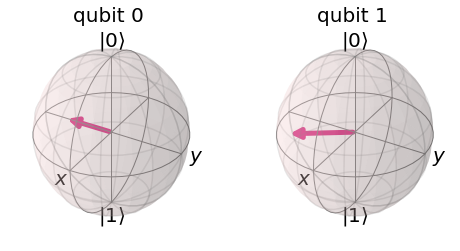

In [130]:
# ---- Fourth cicruit -----#
# Random rotation for both qubits u3(x,y,z)
circuit2 = q.QuantumCircuit(2,2)
x = np.random.uniform(0,2*np.pi,6)

circuit2.u3(x[0], x[1], x[2], 0)
circuit2.u3(x[3], x[4], x[5], 1)
# -------------------------#

statevec2, counts2 = do_job(circuit2)

print("Random values: ", a,"\n")
print("State vector:\n", statevec2, "\n\n", "Counts:", counts)
pbs(statevec2)

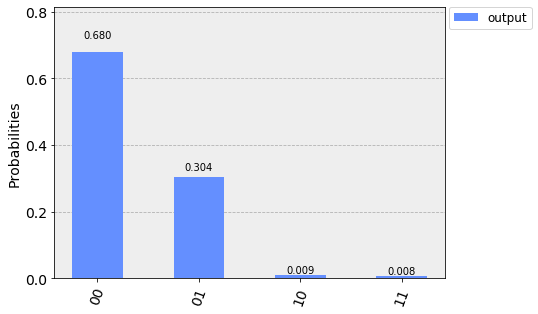

In [120]:
pth([counts2], legend=["output"])